In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
import aa_test as aa

#### A/A-тест, который сходится

 Используется распределение, сходное с распределением средних чеков

In [2]:
n = 1000     # Количество наблюдений распределения
scale = 100  # МО

In [3]:
s1 = pd.DataFrame({  # Выборка 1
    'observations': np.random.exponential(scale=scale, size=n),
    'sample': '1'
})
s2 = pd.DataFrame({  # Выборка 2
    'observations': np.random.exponential(scale=scale, size=n),
    'sample': '2'
})
df = pd.concat([s1, s2]).reset_index(drop=True)

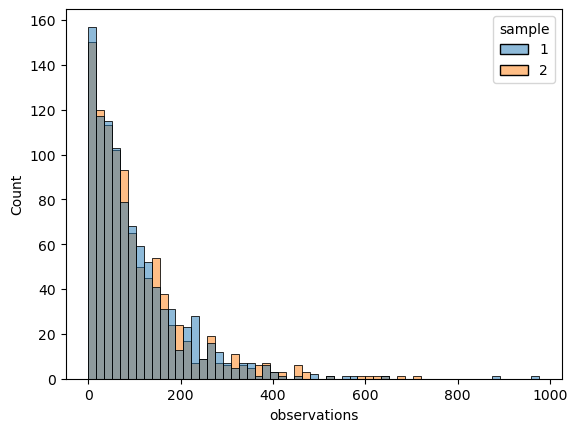

In [4]:
sns.histplot(data=df, x='observations', hue='sample');

  0%|          | 0/5000 [00:00<?, ?it/s]

min sample size: 1000
synthetic subsample size: 100


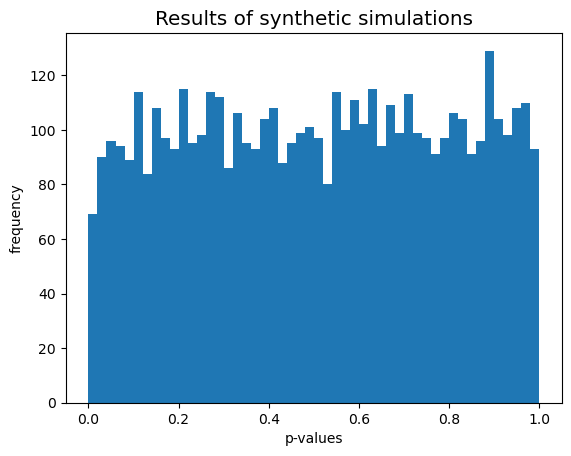

FPR: 0.0418
fpr_ok: True


True

In [5]:
aa.synth_test(
    df.query('sample == "1"').observations, 
    df.query('sample == "2"').observations
)

_Вероятность ошибки 1го рода с указанным исходными данными_

In [6]:
N = 300  # Количество синтетических тестов

In [7]:
# t-test
fpr_ok_statistic = []
for i in tqdm(range(N)):
    s1 = pd.Series(np.random.exponential(scale=scale, size=n))  # Выборка 1
    s2 = pd.Series(np.random.exponential(scale=scale, size=n))  # Выборка 2

    fpr_ok_statistic.append(aa.synth_test(
        s1, 
        s2,
        ss_percent=10,
        n_simulations=5000,
        test='t',
        synth_p_val_th=0.05,
        fpr_err_toler=0.02,
        print_info=False
    ))

err_rate = (N - sum(fpr_ok_statistic)) / N
print(f'err_rate = {round(err_rate*100, 2)} %')

  0%|          | 0/300 [00:00<?, ?it/s]

err_rate = 8.33 %


In [8]:
# U-test
fpr_ok_statistic = []
for i in tqdm(range(N)):
    s1 = pd.Series(np.random.exponential(scale=scale, size=n))  # Выборка 1
    s2 = pd.Series(np.random.exponential(scale=scale, size=n))  # Выборка 2

    fpr_ok_statistic.append(aa.synth_test(
        s1, 
        s2,
        ss_percent=10,
        n_simulations=5000,
        test='u',
        synth_p_val_th=0.05,
        fpr_err_toler=0.02,
        print_info=False
    ))

err_rate = (N - sum(fpr_ok_statistic)) / N
print(f'err_rate = {round(err_rate*100, 2)} %')

  0%|          | 0/300 [00:00<?, ?it/s]

err_rate = 8.33 %


#### A/A-тест, который НЕ сходится

In [9]:
d_scale = 10  # % отличия МО

s1 = pd.DataFrame({  # Выборка 1
    'observations': np.random.exponential(scale=scale, size=n),
    'sample': '1'
})
s2 = pd.DataFrame({  # Выборка 2
    'observations': np.random.exponential(scale=scale*(1 + d_scale/100), size=n),
    'sample': '2'
})
df = pd.concat([s1, s2]).reset_index(drop=True)

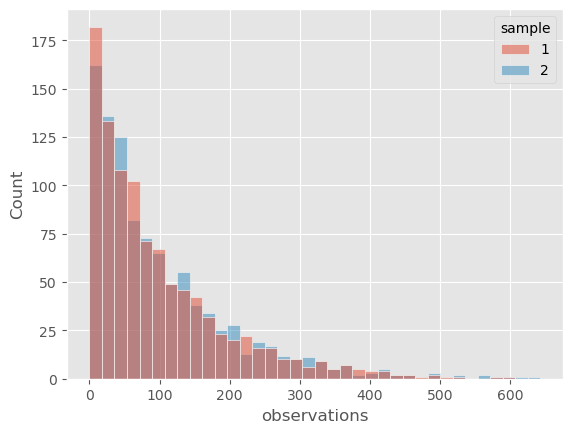

In [10]:
sns.histplot(data=df, x='observations', hue='sample');

  0%|          | 0/5000 [00:00<?, ?it/s]

min sample size: 1000
synthetic subsample size: 100


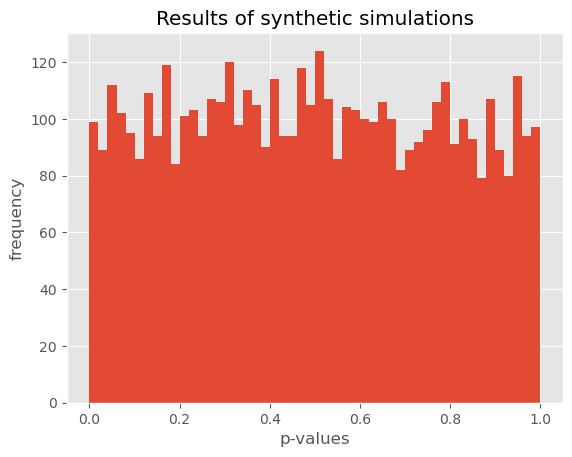

FPR: 0.0498
fpr_ok: True


True

In [11]:
aa.synth_test(
    df.query('sample == "1"').observations, 
    df.query('sample == "2"').observations
)

_Вероятность ошибки 2го рода с указанным исходными данными_

In [12]:
# t-test
fpr_ok_statistic = []
for i in tqdm(range(N)):
    s1 = pd.Series(np.random.exponential(scale=scale, size=n))  # Выборка 1
    s2 = pd.Series(np.random.exponential(scale=scale*(1 + d_scale/100), size=n))  # Выборка 2

    fpr_ok_statistic.append(aa.synth_test(
        s1, 
        s2,
        ss_percent=10,
        n_simulations=5000,
        test='t',
        synth_p_val_th=0.05,
        fpr_err_toler=0.02,
        print_info=False
    ))

err_rate = sum(fpr_ok_statistic) / N
print(f'err_rate = {round(err_rate*100, 2)} %')

  0%|          | 0/300 [00:00<?, ?it/s]

err_rate = 37.0 %


In [13]:
# U-test
fpr_ok_statistic = []
for i in tqdm(range(N)):
    s1 = pd.Series(np.random.exponential(scale=scale, size=n))  # Выборка 1
    s2 = pd.Series(np.random.exponential(scale=scale*(1 + d_scale/100), size=n))  # Выборка 2

    fpr_ok_statistic.append(aa.synth_test(
        s1, 
        s2,
        ss_percent=10,
        n_simulations=5000,
        test='u',
        synth_p_val_th=0.05,
        fpr_err_toler=0.02,
        print_info=False
    ))

err_rate = sum(fpr_ok_statistic) / N
print(f'err_rate = {round(err_rate*100, 2)} %')

  0%|          | 0/300 [00:00<?, ?it/s]

err_rate = 40.0 %


Inspired by: KCM7L10